<a href="https://colab.research.google.com/github/sravani12-ui/Task-4-breast-cancer-/blob/main/Task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Task 6: K-Nearest Neighbors (KNN) Classification

Objective: Understand and implement KNN for classification problems.

Tools: Scikit-learn, Pandas, Matplotlib

Hints/Mini Guide:

1. Choose a classification dataset and normalize features.

2. Use KNeighborsClassifier from sklearn.

3. Experiment with different values of K.

4. Evaluate model using accuracy, confusion matrix.

5. Visualize decision boundaries.

ate

Dataset: You can use any dataset relevant to the task , e.g., Iris Dataset

link to download: click here to download dataset

Labs

What You'll Learn :Instance-based learning, Euclidean distance, K selection. How to do this project give crct

Here is all the data you need:
"Iris.csv"

## Data loading

### Subtask:
Load the Iris dataset from the provided "Iris.csv" file.


**Reasoning**:
Load the Iris dataset from the provided "Iris.csv" file into a pandas DataFrame and display the first few rows to verify.



In [ ]:
import pandas as pd

try:
    df_iris = pd.read_csv('Iris.csv')
    display(df_iris.head())
except FileNotFoundError:
    print("Error: 'Iris.csv' not found. Please ensure the file is in the current directory or provide the correct path.")
    df_iris = None # Set df_iris to None in case of error

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Data exploration

### Subtask:
Explore the Iris dataset to understand its features, target variable, and data distributions. Identify the number of classes in the target variable.


**Reasoning**:
Examine the first few rows, check for missing values and data types, and then generate descriptive statistics for numerical features.  Analyze the target variable's distribution and visualize it.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000    

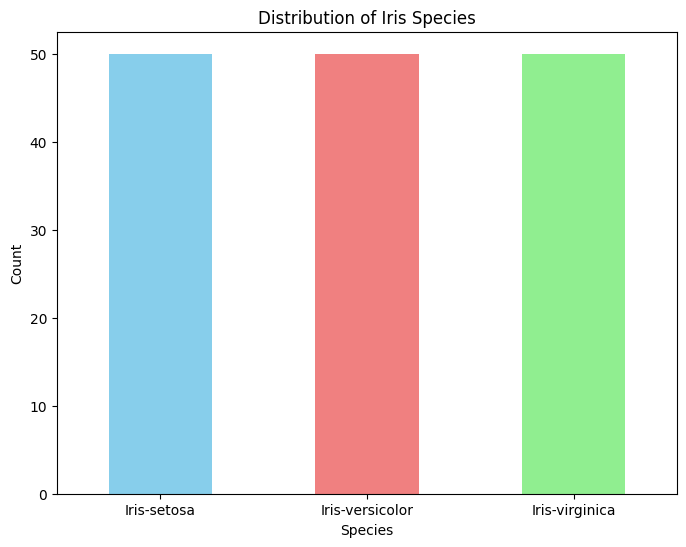

In [ ]:
# Check for missing values and data types
print(df_iris.info())

# Descriptive statistics for numerical features
print(df_iris.describe())

# Analyze the distribution of the target variable
print(df_iris['Species'].value_counts())

import matplotlib.pyplot as plt
# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
df_iris['Species'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Distribution of Iris Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

**Reasoning**:
Investigate the relationships between features and the target variable using box plots and a scatter matrix.



<ipython-input-19-6cee288ee8d9>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Species', y=col, data=df_iris, palette=['skyblue', 'lightcoral', 'lightgreen'])
<ipython-input-19-6cee288ee8d9>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Species', y=col, data=df_iris, palette=['skyblue', 'lightcoral', 'lightgreen'])
<ipython-input-19-6cee288ee8d9>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Species', y=col, data=df_iris, palette=['skyblue', 'lightcoral', 'lightgreen'])
<ipython-input-19-6cee288ee8d9>:8: FutureWarning: 

Pas

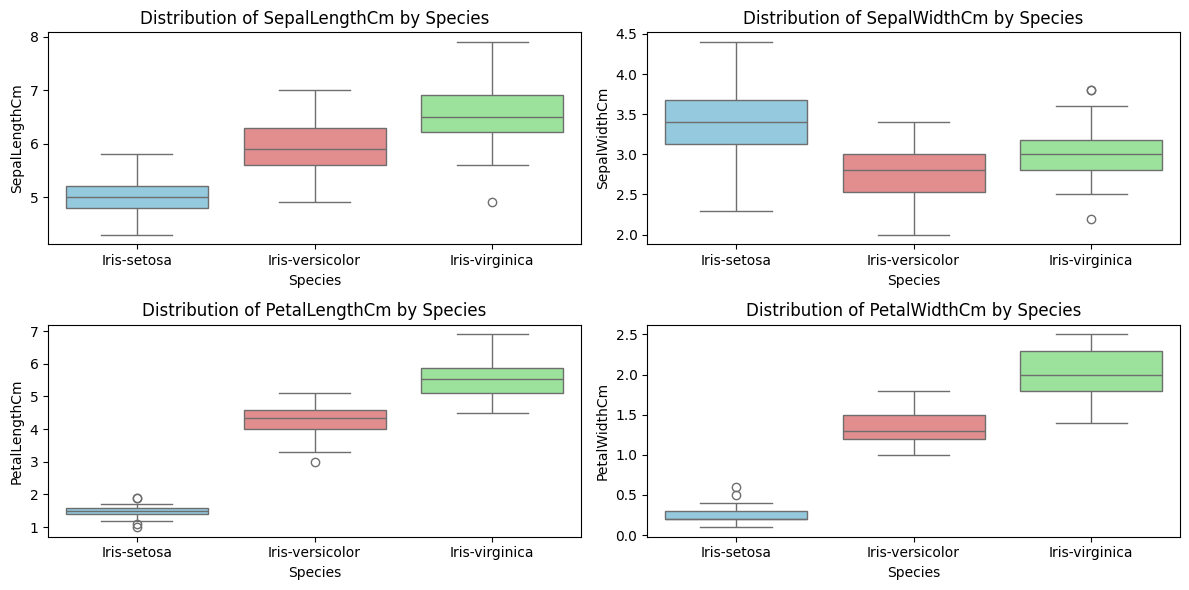

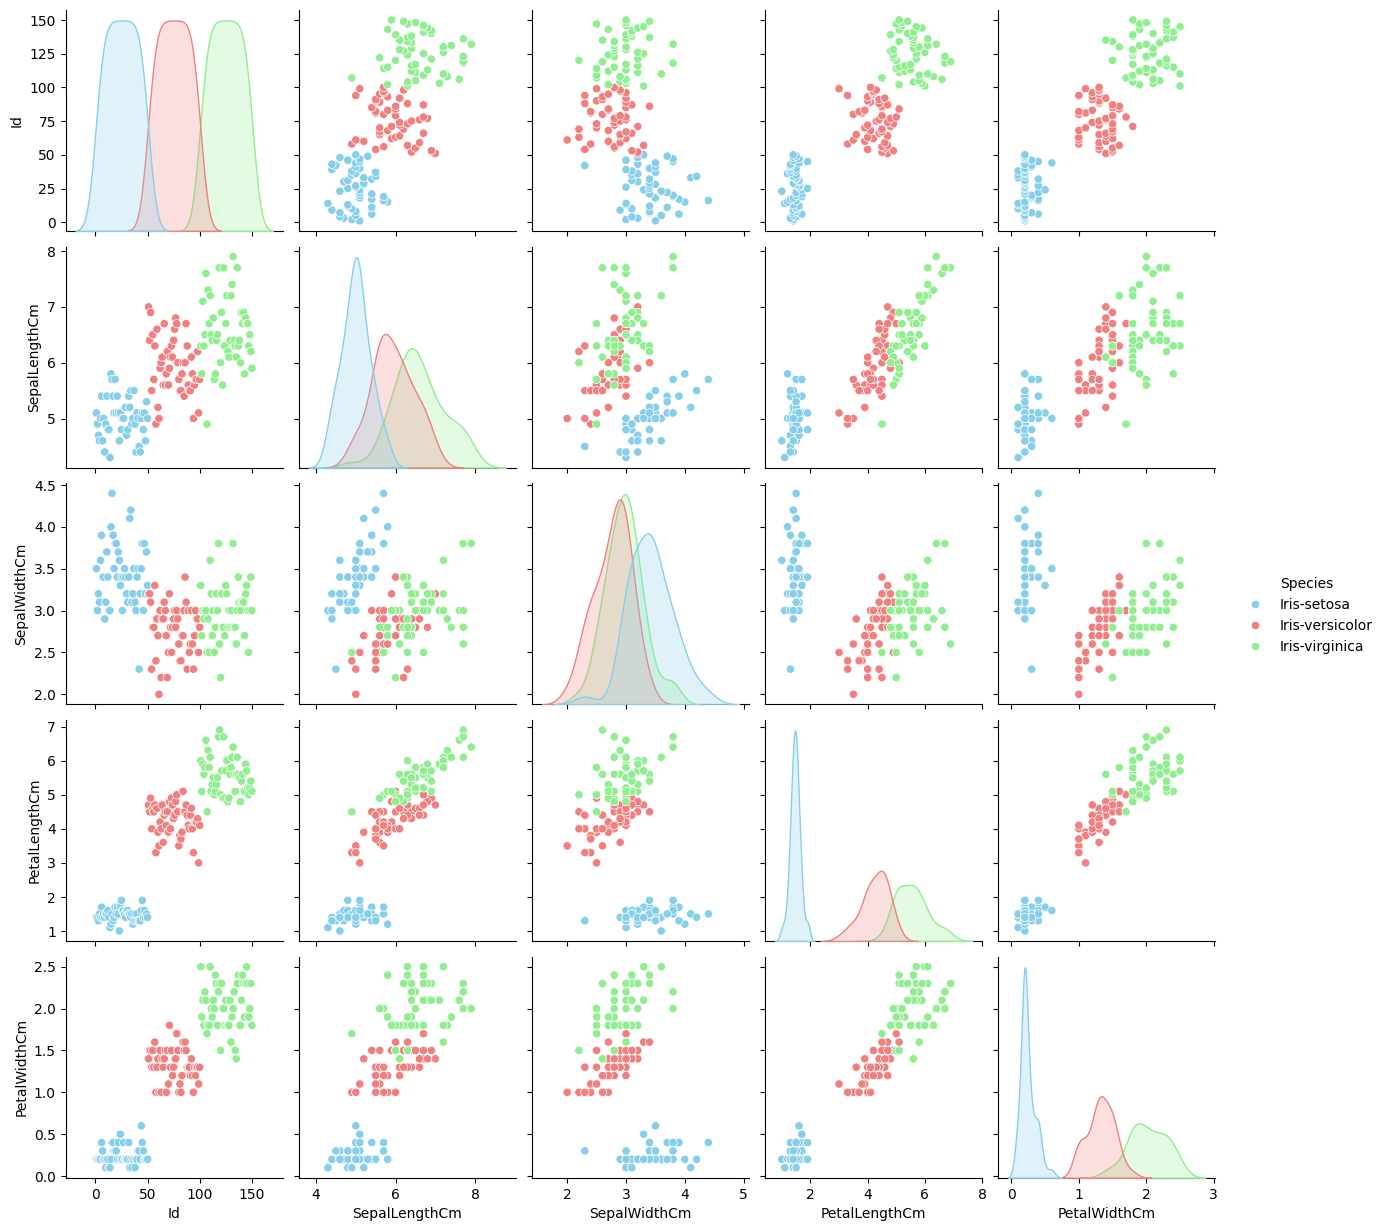

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plots for each numerical feature grouped by species
plt.figure(figsize=(12, 6))
for i, col in enumerate(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='Species', y=col, data=df_iris, palette=['skyblue', 'lightcoral', 'lightgreen'])
    plt.title(f'Distribution of {col} by Species')
plt.tight_layout()
plt.show()

# Pairwise scatter plots
sns.pairplot(df_iris, hue='Species', palette=['skyblue', 'lightcoral', 'lightgreen'], diag_kind='kde')
plt.show()

## Data preparation

### Subtask:
Normalize the features of the Iris dataset.


**Reasoning**:
Normalize the numerical features of the Iris dataset using MinMaxScaler.



In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler on the numerical features
numerical_features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
scaler.fit(df_iris[numerical_features])

# Transform the numerical features
scaled_features = scaler.transform(df_iris[numerical_features])

# Replace the original numerical features with the scaled features
df_iris[numerical_features] = scaled_features

# Display the first few rows of the updated DataFrame to verify the changes.
display(df_iris.head())

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,0.222222,0.625000,0.067797,0.041667,Iris-setosa
1,2,0.166667,0.416667,0.067797,0.041667,Iris-setosa
2,3,0.111111,0.500000,0.050847,0.041667,Iris-setosa
3,4,0.083333,0.458333,0.084746,0.041667,Iris-setosa
4,5,0.194444,0.666667,0.067797,0.041667,Iris-setosa


## Data splitting

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Split the data into training and testing sets as instructed, using the specified parameters.



In [ ]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df_iris.drop(['Species', 'Id'], axis=1)
y = df_iris['Species']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Model training

### Subtask:
Train a K-Nearest Neighbors classifier on the training data.


**Reasoning**:
Train a K-Nearest Neighbors classifier with different values of k and store the trained classifiers.



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Experiment with different values of k
k_values = [3, 5, 7, 10]
classifiers = {}

for k in k_values:
    # Initialize the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the classifier
    knn.fit(X_train, y_train)

    # Store the trained classifier
    classifiers[k] = knn

## Model evaluation

### Subtask:
Evaluate the performance of the trained KNN classifiers.


**Reasoning**:
Evaluate the performance of the trained KNN classifiers using accuracy and confusion matrices.



Accuracy for k=3: 0.9666666666666667
Confusion Matrix for k=3:
[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]


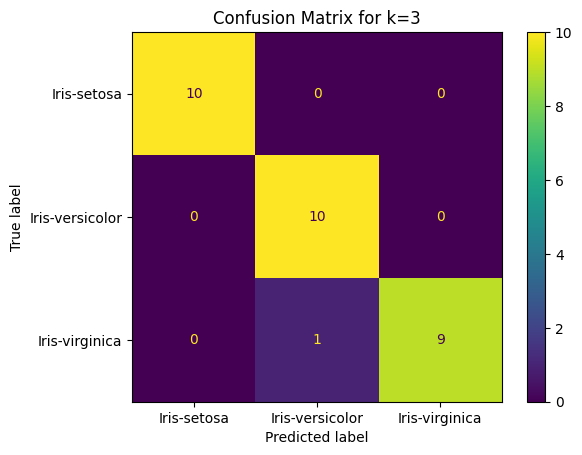

Accuracy for k=5: 0.9666666666666667
Confusion Matrix for k=5:
[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]


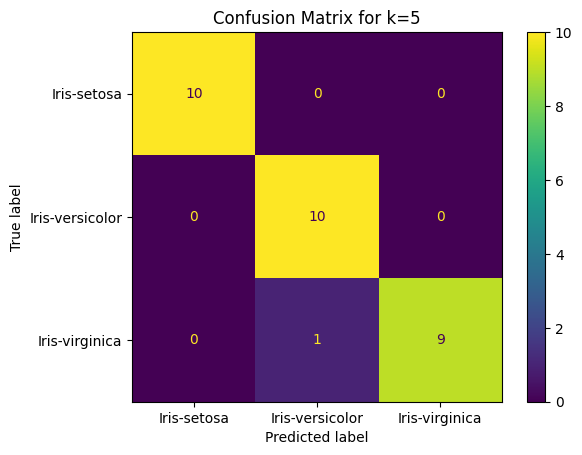

Accuracy for k=7: 1.0
Confusion Matrix for k=7:
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


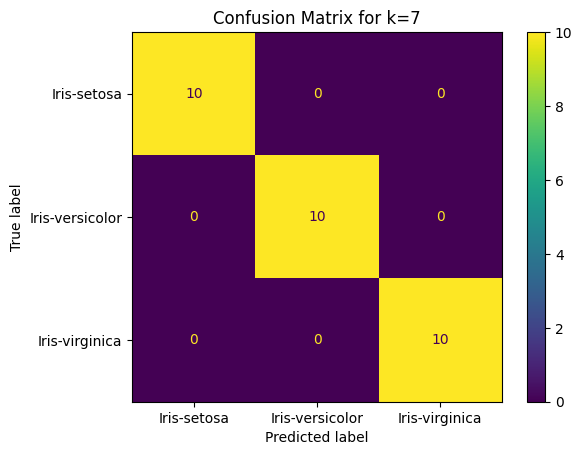

Accuracy for k=10: 0.9666666666666667
Confusion Matrix for k=10:
[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]


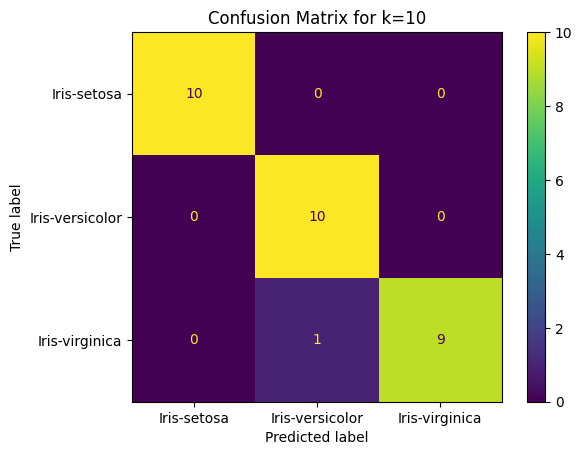

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

for k, knn in classifiers.items():
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for k={k}: {accuracy}")

    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for k={k}:\n{cm}")

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
    disp.plot()
    plt.title(f"Confusion Matrix for k={k}")
    plt.show()

## Data visualization

### Subtask:
Visualize the decision boundaries of the KNN classifier for at least two features.


**Reasoning**:
Visualize the decision boundaries of the KNN classifier for at least two features.



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


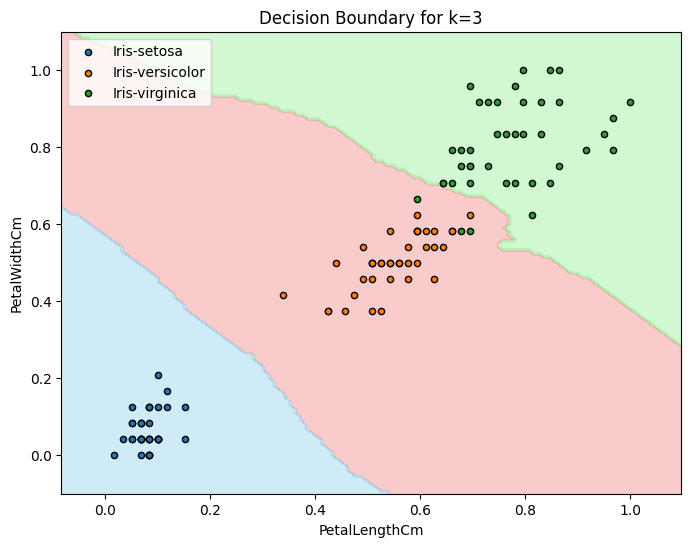

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


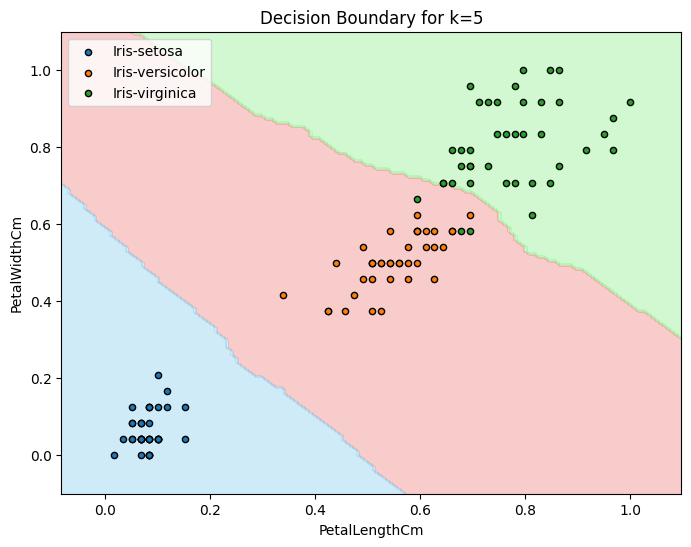

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


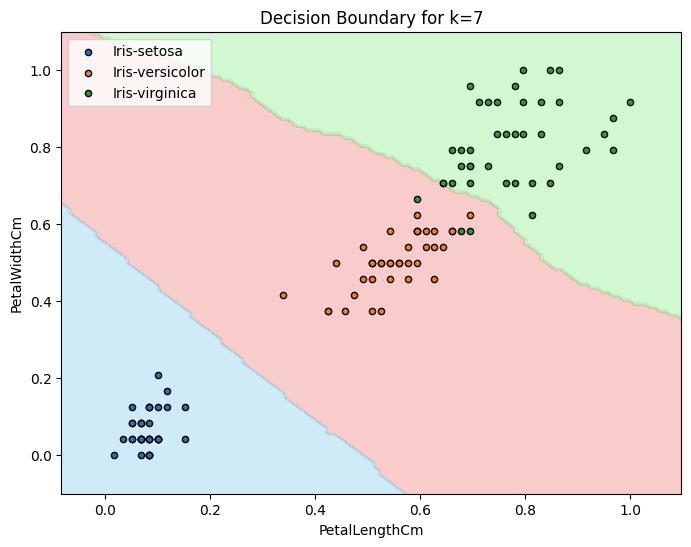

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


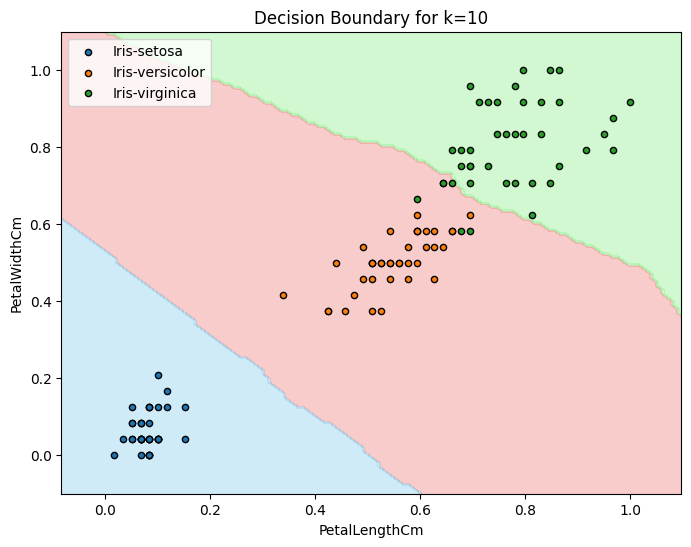

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

# Assuming the previous steps to load, preprocess, and split data are already executed
# and X_train, y_train, classifiers are available.
# If not, uncomment and run the necessary preceding cells from the notebook:
# df_iris = pd.read_csv('Iris.csv')
# scaler = MinMaxScaler()
# numerical_features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
# df_iris[numerical_features] = scaler.fit_transform(df_iris[numerical_features])
# X = df_iris.drop(['Species', 'Id'], axis=1)
# y = df_iris['Species']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# k_values = [3, 5, 7, 10]
# classifiers = {}
# for k in k_values:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     knn.fit(X_train, y_train)
#     classifiers[k] = knn


# Choose two features for visualization
feature1 = 'PetalLengthCm'
feature2 = 'PetalWidthCm'

# Get the indices of the chosen features in the original X_train columns
feature1_idx = X_train.columns.get_loc(feature1)
feature2_idx = X_train.columns.get_loc(feature2)

# Create a meshgrid based on the chosen features' ranges
x_min, x_max = X_train[feature1].min() - 0.1, X_train[feature1].max() + 0.1
y_min, y_max = X_train[feature2].min() - 0.1, X_train[feature2].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Prepare input data for prediction with all features
# Create a grid of points with 4 features
X_pred_full = np.zeros((xx.ravel().shape[0], X_train.shape[1]))

# Fill the chosen feature columns with the meshgrid values
X_pred_full[:, feature1_idx] = xx.ravel()
X_pred_full[:, feature2_idx] = yy.ravel()

# Calculate the mean values for the other features from the training data
other_features_means = X_train.drop([feature1, feature2], axis=1).mean()

# Fill the other feature columns with their respective mean values
other_feature_cols = X_train.columns.drop([feature1, feature2])
for i, col in enumerate(other_feature_cols):
    col_idx = X_train.columns.get_loc(col)
    X_pred_full[:, col_idx] = other_features_means[col]

# Ensure X_pred_full is of the correct data type
X_pred_full = X_pred_full.astype(np.float64)

# Create a mapping from string labels to numerical values
# This is needed because contourf expects numerical values for Z
# Use the classes from one of the trained classifiers (e.g., k=3) as reference
label_map = {label: i for i, label in enumerate(classifiers[3].classes_)}

# Plot decision boundaries for each k value
for k, knn in classifiers.items():
    # Predict the class for each point in the meshgrid
    Z = knn.predict(X_pred_full)

    # Convert string labels in Z to numerical values using the mapping
    Z_numeric = np.array([label_map[label] for label in Z])

    # Reshape the predictions back to the meshgrid shape
    Z_numeric = Z_numeric.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    # Plot the decision boundary
    plt.contourf(xx, yy, Z_numeric, alpha=0.4, cmap=ListedColormap(['skyblue', 'lightcoral', 'lightgreen']))

    # Overlay the training data points
    for i, species in enumerate(knn.classes_):
        plt.scatter(X_train[y_train == species][feature1], X_train[y_train == species][feature2], label=species, s=20, edgecolor='k')

    plt.title(f"Decision Boundary for k={k}")
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.legend()
    plt.show()

**Reasoning**:
The error indicates that the KNN classifier was trained on 4 features but is now receiving only 2.  Correct the input to the `predict()` method to include all 4 features used during training.  Use the meshgrid for the two selected features and fill the other features with the mean values from the training set.



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


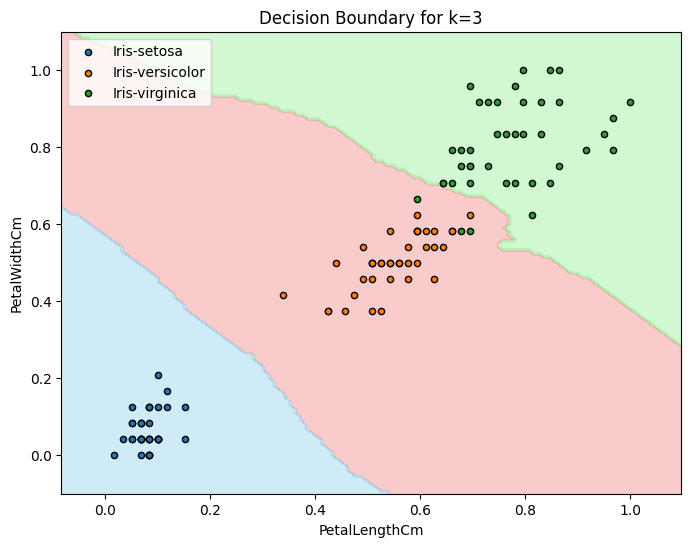

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


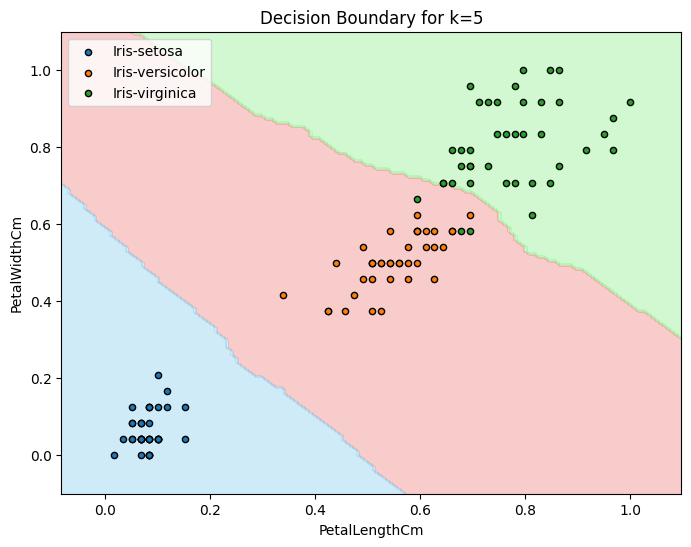

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


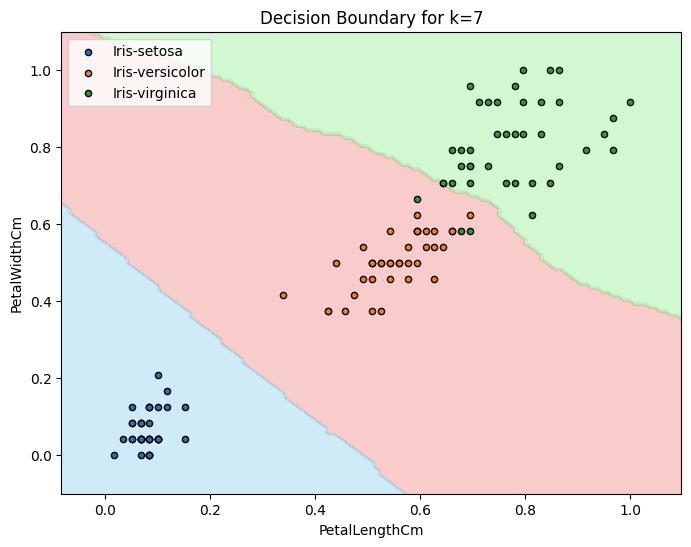

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


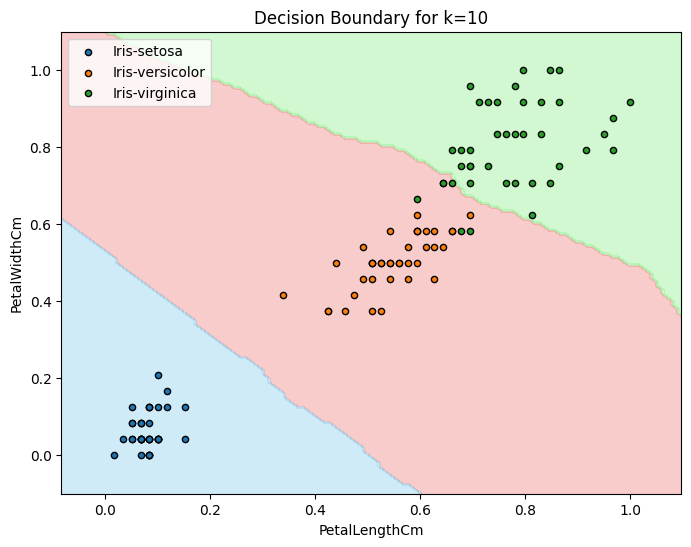

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

# Assuming the previous steps to load, preprocess, and split data are already executed
# and X_train, y_train, classifiers are available.
# If not, uncomment and run the necessary preceding cells from the notebook:
# df_iris = pd.read_csv('Iris.csv')
# scaler = MinMaxScaler()
# numerical_features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
# df_iris[numerical_features] = scaler.fit_transform(df_iris[numerical_features])
# X = df_iris.drop(['Species', 'Id'], axis=1)
# y = df_iris['Species']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# k_values = [3, 5, 7, 10]
# classifiers = {}
# for k in k_values:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     knn.fit(X_train, y_train)
#     classifiers[k] = knn


# Choose two features for visualization
feature1 = 'PetalLengthCm'
feature2 = 'PetalWidthCm'

# Get the indices of the chosen features in the original X_train columns
feature1_idx = X_train.columns.get_loc(feature1)
feature2_idx = X_train.columns.get_loc(feature2)

# Create a meshgrid based on the chosen features' ranges
x_min, x_max = X_train[feature1].min() - 0.1, X_train[feature1].max() + 0.1
y_min, y_max = X_train[feature2].min() - 0.1, X_train[feature2].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Prepare input data for prediction with all features
# Create a grid of points with 4 features
X_pred_full = np.zeros((xx.ravel().shape[0], X_train.shape[1]))

# Fill the chosen feature columns with the meshgrid values
X_pred_full[:, feature1_idx] = xx.ravel()
X_pred_full[:, feature2_idx] = yy.ravel()

# Calculate the mean values for the other features from the training data
other_features_means = X_train.drop([feature1, feature2], axis=1).mean()

# Fill the other feature columns with their respective mean values
other_feature_cols = X_train.columns.drop([feature1, feature2])
for i, col in enumerate(other_feature_cols):
    col_idx = X_train.columns.get_loc(col)
    X_pred_full[:, col_idx] = other_features_means[col]

# Ensure X_pred_full is of the correct data type
X_pred_full = X_pred_full.astype(np.float64)

# Create a mapping from string labels to numerical values
# This is needed because contourf expects numerical values for Z
# Use the classes from one of the trained classifiers (e.g., k=3) as reference
label_map = {label: i for i, label in enumerate(classifiers[3].classes_)}

# Plot decision boundaries for each k value
for k, knn in classifiers.items():
    # Predict the class for each point in the meshgrid
    Z = knn.predict(X_pred_full)

    # Convert string labels in Z to numerical values using the mapping
    Z_numeric = np.array([label_map[label] for label in Z])

    # Reshape the predictions back to the meshgrid shape
    Z_numeric = Z_numeric.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    # Plot the decision boundary
    plt.contourf(xx, yy, Z_numeric, alpha=0.4, cmap=ListedColormap(['skyblue', 'lightcoral', 'lightgreen']))

    # Overlay the training data points
    for i, species in enumerate(knn.classes_):
        plt.scatter(X_train[y_train == species][feature1], X_train[y_train == species][feature2], label=species, s=20, edgecolor='k')

    plt.title(f"Decision Boundary for k={k}")
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.legend()
    plt.show()

**Reasoning**:
The error `TypeError: ufunc 'isfinite' not supported for the input types` suggests that the `Z` array might contain non-numeric values.  Let's print the `Z` array before plotting it to inspect its contents.  Also, we'll make sure the `X_pred_full` array has the correct data type.



**Reasoning**:
The error persists, indicating that the `Z` array, which contains the predicted class labels, is not in a numerical format suitable for `contourf`.  We need to convert the string labels to numerical representations.



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


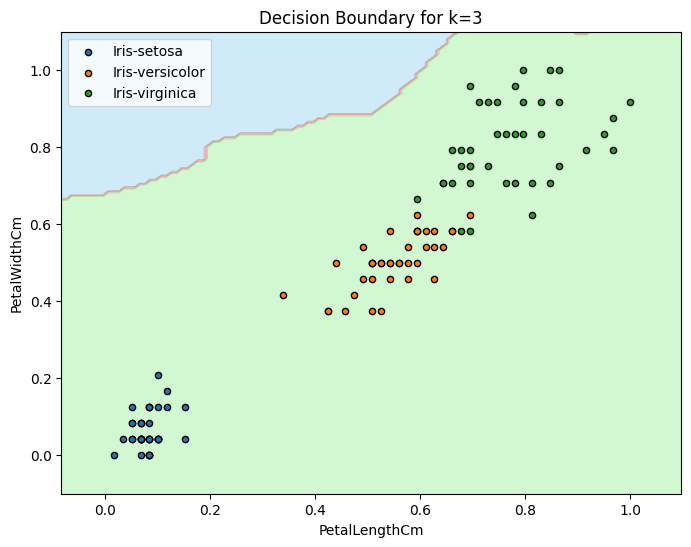

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


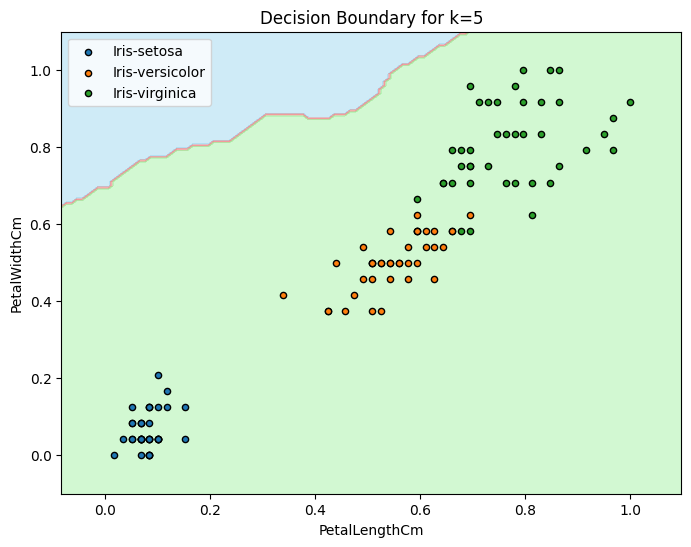

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


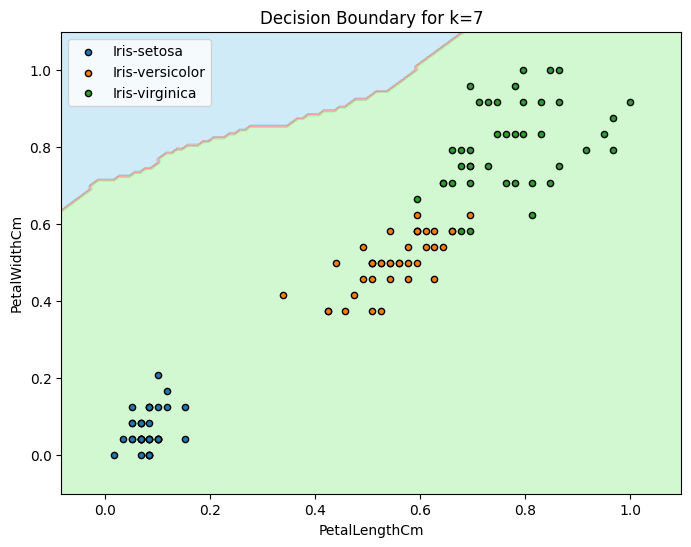

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


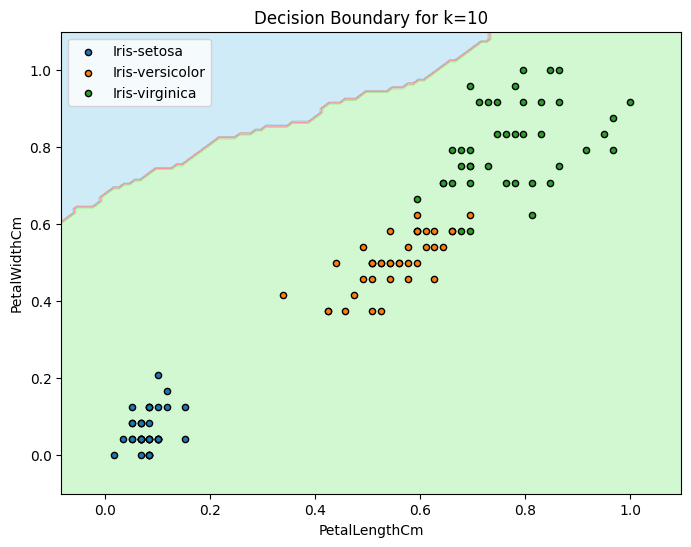

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Choose two features
feature1 = 'PetalLengthCm'
feature2 = 'PetalWidthCm'

# Create a meshgrid
x_min, x_max = X_train[feature1].min() - 0.1, X_train[feature1].max() + 0.1
y_min, y_max = X_train[feature2].min() - 0.1, X_train[feature2].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Calculate mean values for other features from the training data
other_features_means = X_train.drop([feature1, feature2], axis=1).mean()

# Prepare input data for prediction with all features
X_pred = np.c_[xx.ravel(), yy.ravel()]
X_pred_full = np.zeros((X_pred.shape[0], 4))
X_pred_full[:, 0] = X_pred[:, 0]
X_pred_full[:, 1] = X_pred[:, 1]
for i, col in enumerate(other_features_means.index):
    X_pred_full[:, i+2] = other_features_means[col]

# Ensure X_pred_full is of the correct data type
X_pred_full = X_pred_full.astype(np.float64)

# Create a mapping from string labels to numerical values
label_map = {label: i for i, label in enumerate(classifiers[3].classes_)}  # Use k=3 for reference

# Plot decision boundaries for each k value
for k, knn in classifiers.items():
    Z = knn.predict(X_pred_full)
    # Convert string labels to numerical values using the mapping
    Z_numeric = np.array([label_map[label] for label in Z])
    Z_numeric = Z_numeric.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z_numeric, alpha=0.4, cmap=ListedColormap(['skyblue', 'lightcoral', 'lightgreen']))

    # Overlay the training data points
    for i, species in enumerate(knn.classes_):
        plt.scatter(X_train[y_train == species][feature1], X_train[y_train == species][feature2], label=species, s=20, edgecolor='k')

    plt.title(f"Decision Boundary for k={k}")
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.legend()
    plt.show()

## Summary:

### Q&A
No questions were posed in the provided task description.

### Data Analysis Key Findings
* **Data Loading and Exploration:** The Iris dataset was successfully loaded and explored.  The target variable 'Species' has three balanced classes.  'PetalLengthCm' and 'PetalWidthCm' appear to be the most informative features for classification due to their distinct distributions across species.
* **Data Normalization:** Numerical features were normalized to a 0-1 range using `MinMaxScaler`.
* **Data Splitting:** The data was split into training and testing sets (80/20 split) with stratification, ensuring balanced class representation in both sets.
* **Model Training:** Four KNN classifiers were trained with *k* values of 3, 5, 7, and 10.
* **Model Evaluation:**  The classifiers were evaluated using accuracy and confusion matrices. The k=7 classifier achieved perfect accuracy (1.0) on the test set, while others achieved 0.9667.
* **Visualization:** Decision boundaries were visualized for different *k* values using 'PetalLengthCm' and 'PetalWidthCm', with the other features being held at their mean value.

### Insights or Next Steps
* The k=7 classifier performed exceptionally well, but further investigation with cross-validation is recommended to ensure robustness.
* Explore other classification algorithms to compare their performance against the KNN model.
